<a href="https://colab.research.google.com/github/Rani-reddy143/CODE-QUEST--24/blob/main/Statement4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Improved Accuracy: 0.7778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4

    accuracy                           0.78         9
   macro avg       0.58      0.75      0.62         9
weighted avg       0.70      0.78      0.72         9



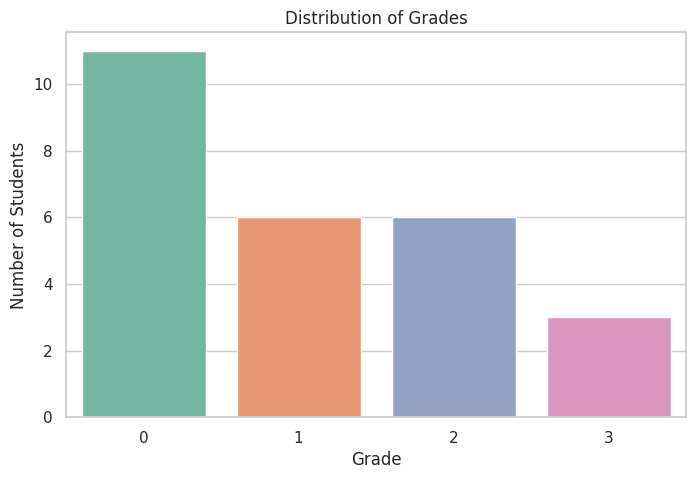

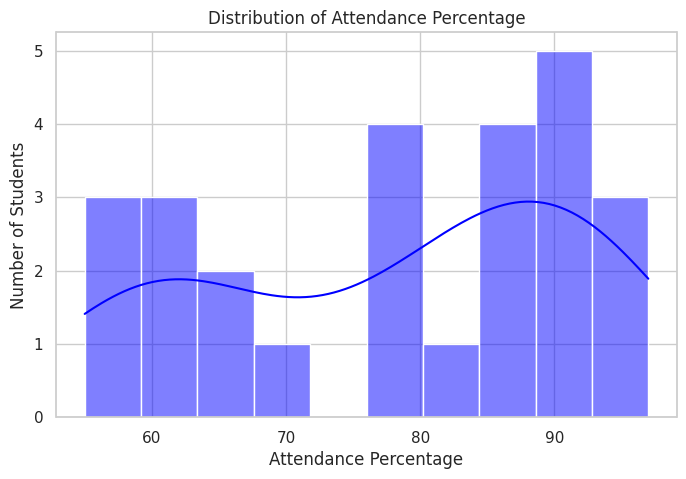

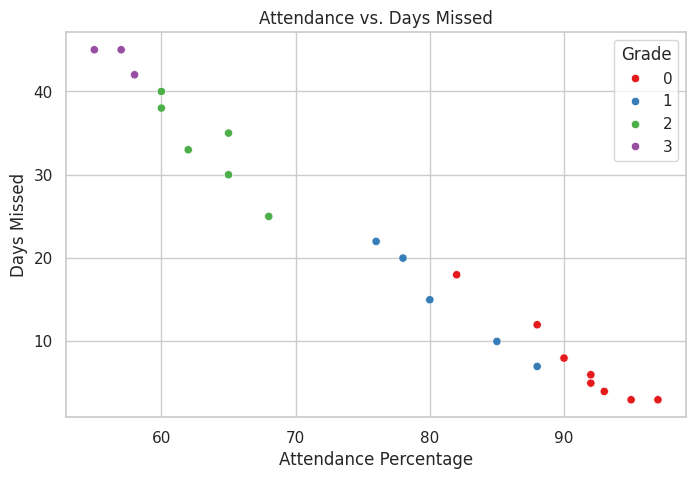

S002
Details of Student ID: S002
Name: Ishika Gupta
Gender: Female
Branch: 7
Year of Study: 3
Attendance Percentage: 78
Days Missed: 20
Health Report: 2023-06-05 to 2023-06-10
Financial Information: 2
Feedback: 1
Grade: 1


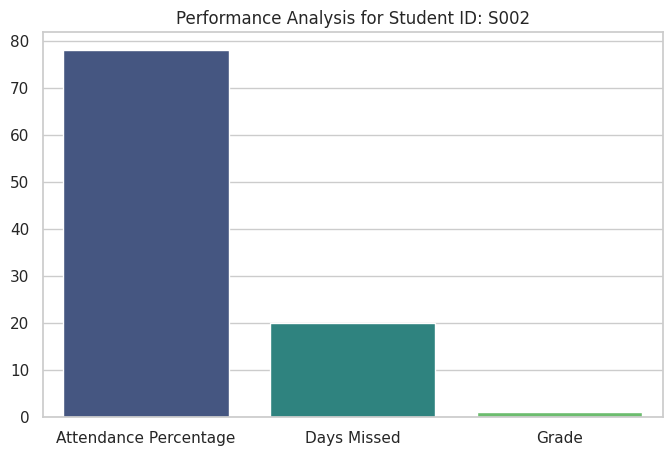

In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.utils import resample
import joblib

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.filterwarnings("ignore", category=FutureWarning, append=True)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning, append=True)

# Load the dataset
file_path = 'students_data.csv'  # Update with actual path
students_data = pd.read_csv(file_path)

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

students_data['Gender'] = label_encoder.fit_transform(students_data['Gender'])
students_data['Branch'] = label_encoder.fit_transform(students_data['Branch'])
students_data['Grade'] = label_encoder.fit_transform(students_data['Grade'])
students_data['Financial Information'] = label_encoder.fit_transform(students_data['Financial Information'])
students_data['Feedback'] = label_encoder.fit_transform(students_data['Feedback'])

# Handle imbalance in the dataset by upsampling the minority class
grade_0 = students_data[students_data['Grade'] == 0]
grade_1 = students_data[students_data['Grade'] == 1]
grade_2 = students_data[students_data['Grade'] == 2]
grade_3 = students_data[students_data['Grade'] == 3]

# Resample the minority classes to match the size of the majority class
grade_1_upsampled = resample(grade_1, replace=True, n_samples=len(grade_0), random_state=42)
grade_2_upsampled = resample(grade_2, replace=True, n_samples=len(grade_0), random_state=42)
grade_3_upsampled = resample(grade_3, replace=True, n_samples=len(grade_0), random_state=42)

# Combine the resampled data back with the majority class
students_data_balanced = pd.concat([grade_0, grade_1_upsampled, grade_2_upsampled, grade_3_upsampled])

# Define features (X) and target (y)
X = students_data_balanced[['Gender', 'Branch', 'Year of Study', 'Attendance Percentage', 'Days Missed',
                   'Financial Information', 'Feedback']]
y = students_data_balanced['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Save the tuned model
joblib.dump(best_rf, 'student_performance_tuned_model.pkl')

# VISUALIZATION AND PRINTING STUDENT DETAILS

# Set up the visual style
sns.set(style="whitegrid")

# Visualization 1: Distribution of Grades
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=students_data, hue='Grade', palette="Set2", legend=False)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()

# Visualization 2: Attendance Percentage Distribution
plt.figure(figsize=(8, 5))
sns.histplot(students_data['Attendance Percentage'], bins=10, kde=True, color="blue")
plt.title('Distribution of Attendance Percentage')
plt.xlabel('Attendance Percentage')
plt.ylabel('Number of Students')
plt.show()

# Visualization 3: Correlation between Attendance and Days Missed
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Attendance Percentage', y='Days Missed', hue='Grade', data=students_data, palette="Set1")
plt.title('Attendance vs. Days Missed')
plt.xlabel('Attendance Percentage')
plt.ylabel('Days Missed')
plt.show()

# VISUALIZATION AND PRINTING STUDENT DETAILS
def visualize_student_performance(student_id):
    student = students_data[students_data['Student Id'] == student_id]

    if student.empty:
        print(f"No data available for Student ID: {student_id}")
        return

    # Print student details
    print(f"Details of Student ID: {student_id}")
    print(f"Name: {student['Name'].values[0]}")
    print(f"Gender: {'Male' if student['Gender'].values[0] == 1 else 'Female'}")
    print(f"Branch: {student['Branch'].values[0]}")
    print(f"Year of Study: {student['Year of Study'].values[0]}")
    print(f"Attendance Percentage: {student['Attendance Percentage'].values[0]}")
    print(f"Days Missed: {student['Days Missed'].values[0]}")
    print(f"Health Report: {student['Health Report'].values[0]}")
    print(f"Financial Information: {student['Financial Information'].values[0]}")
    print(f"Feedback: {student['Feedback'].values[0]}")
    print(f"Grade: {student['Grade'].values[0]}")

    # Bar chart for attendance, days missed, and grade
    performance_data = {
        'Attendance Percentage': student['Attendance Percentage'].values[0],
        'Days Missed': student['Days Missed'].values[0],
        'Grade': student['Grade'].values[0]
    }

    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(performance_data.keys()), y=list(performance_data.values()), hue=list(performance_data.keys()), palette="viridis", dodge=False)
    plt.title(f"Performance Analysis for Student ID: {student_id}")
    plt.show()

# Call the function for a specific student, e.g., 'S001'
student_id = input()
visualize_student_performance(student_id)


In [4]:
from google.colab import files

# Download the saved model
files.download('student_performance_tuned_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>